<a href="https://colab.research.google.com/github/hphung188/UW_ML_Fraud/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Kaggle credentials
from google.colab import userdata
import os

os.environ["kaggle_key"] = userdata.get('kaggle_key')
os.environ["kaggle_user"] = userdata.get('kaggle_user')

In [2]:
# Download the dataset's repo
# !kaggle competitions download -c <competition name>
!kaggle datasets download -d sgpjesus/bank-account-fraud-dataset-neurips-2022

Dataset URL: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022
License(s): CC-BY-NC-SA-4.0
100% 532M/532M [00:10<00:00, 49.8MB/s]
100% 532M/532M [00:10<00:00, 55.3MB/s]


In [3]:
# Unzip the dataset
!unzip "bank-account-fraud-dataset-neurips-2022.zip"

Archive:  bank-account-fraud-dataset-neurips-2022.zip
  inflating: Base.csv                
  inflating: Variant I.csv           
  inflating: Variant II.csv          
  inflating: Variant III.csv         
  inflating: Variant IV.csv          
  inflating: Variant V.csv           


In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline

# Increase the maximum number of columns
pd.set_option('display.max_columns', 100)

# Set the default style of Matplotlib plots to "ggplot"
plt.style.use('ggplot')

In [5]:
# Read data and show first 5 rows
df = pd.read_csv("Base.csv")
new_df = df.copy()
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [6]:
df.source.unique()

array(['INTERNET', 'TELEAPP'], dtype=object)

In [7]:
# Get the number of rows and columns in the data
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 1000000
Number of columns: 32


In [8]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [9]:
# Get the percentage of fraud vs. non-fraud population in the data
df['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [10]:
# Get the number of unique values in each column of the DataFrame
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [11]:
# Display the correlation among the variables
df.select_dtypes(include='number').corr().round(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
fraud_bool,1.00,0.05,-0.04,-0.03,0.03,0.06,0.00,-0.02,0.01,-0.02,-0.01,-0.01,-0.01,-0.04,0.07,0.03,-0.04,-0.01,-0.00,-0.04,0.07,0.02,0.01,-0.05,0.04,NaN,0.01
income,0.05,1.00,-0.04,0.02,-0.04,0.13,-0.02,0.06,-0.08,-0.10,-0.10,-0.11,0.01,-0.06,0.17,-0.02,0.02,0.01,-0.00,0.09,0.11,0.01,-0.06,-0.04,-0.01,NaN,0.12
name_email_similarity,-0.04,-0.04,1.00,-0.02,0.05,-0.05,-0.01,0.03,0.03,0.02,0.04,0.04,-0.00,0.02,0.05,-0.07,-0.00,0.01,-0.01,0.01,0.07,-0.02,0.01,0.01,-0.02,NaN,-0.04
prev_address_months_count,-0.03,0.02,-0.02,1.00,-0.27,-0.07,0.08,-0.01,-0.03,-0.00,0.01,0.01,-0.04,0.06,-0.02,-0.01,-0.05,0.00,-0.05,-0.04,-0.03,0.02,0.05,0.03,0.01,NaN,-0.00
current_address_months_count,0.03,-0.04,0.05,-0.27,1.00,0.14,-0.06,0.06,0.05,0.03,0.02,0.03,0.05,-0.17,0.09,-0.08,0.13,-0.09,0.07,0.06,0.13,-0.01,-0.03,-0.05,-0.00,NaN,-0.02
customer_age,0.06,0.13,-0.05,-0.07,0.14,1.00,-0.04,-0.01,-0.01,-0.02,-0.01,-0.00,0.05,-0.42,0.17,-0.00,0.21,-0.15,0.01,0.11,0.15,-0.00,0.03,-0.02,0.03,NaN,0.01
days_since_request,0.00,-0.02,-0.01,0.08,-0.06,-0.04,1.00,0.02,0.00,0.03,0.02,0.02,-0.02,0.02,-0.09,0.01,-0.04,0.01,-0.03,-0.05,-0.07,0.00,0.05,0.00,0.01,NaN,-0.02
intended_balcon_amount,-0.02,0.06,0.03,-0.01,0.06,-0.01,0.02,1.00,0.00,0.04,0.06,0.05,0.10,-0.03,0.00,-0.01,0.00,0.04,0.18,0.10,0.06,0.01,0.02,-0.02,-0.02,NaN,-0.04
zip_count_4w,0.01,-0.08,0.03,-0.03,0.05,-0.01,0.00,0.00,1.00,0.14,0.20,0.30,0.01,0.13,-0.10,0.02,-0.04,0.01,0.05,-0.02,-0.01,0.02,0.04,0.02,0.02,NaN,-0.29
velocity_6h,-0.02,-0.10,0.02,-0.00,0.03,-0.02,0.03,0.04,0.14,1.00,0.46,0.40,0.02,0.12,-0.15,0.03,-0.04,-0.01,0.01,-0.01,-0.03,-0.00,0.05,0.00,0.03,NaN,-0.41


In [12]:
# Get a summary of statistical info for each numerical column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [13]:
# Get a summary of statistical info for each numerical column
df[df['fraud_bool'] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,11029.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
income,11029.0,0.686635,0.265579,0.100000,0.600000,0.800000,0.900000,0.900000
name_email_similarity,11029.0,0.393161,0.295607,0.000132,0.134257,0.292420,0.676543,0.999953
prev_address_months_count,11029.0,5.861365,32.816956,-1.000000,-1.000000,-1.000000,-1.000000,357.000000
current_address_months_count,11029.0,114.801161,85.324351,-1.000000,53.000000,94.000000,156.000000,392.000000
customer_age,11029.0,40.858645,13.086334,10.000000,30.000000,40.000000,50.000000,90.000000
days_since_request,11029.0,1.054615,5.707977,0.000001,0.005911,0.013094,0.023265,75.495921
intended_balcon_amount,11029.0,3.962009,16.622067,-8.249792,-1.195618,-0.900578,-0.562268,111.321272
zip_count_4w,11029.0,1622.311542,1005.687071,18.000000,909.000000,1328.000000,2050.000000,6368.000000
velocity_6h,11029.0,5183.913444,2902.298679,64.422571,2894.349366,4916.464728,7128.603281,16084.617170


In [14]:
# Get a summary of statistical information for each non-numerical column in the DataFrame
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [15]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
fraud_vals.reset_index(inplace=True)
# fraud_vals.rename(columns={'index': 'fraud_bool', 'fraud_bool': 'count'}, inplace=True)
print(fraud_vals)

   fraud_bool   count
0           0  988971
1           1   11029


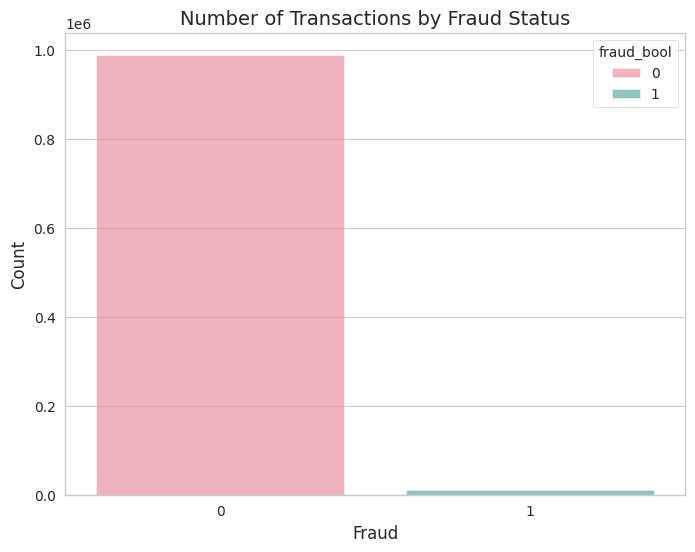

In [16]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6, hue="fraud_bool")

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()

The graph of the binary target feature reveals a highly imbalanced distribution, characterised by an extremely low prevalence of the positive class.

In [17]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            74.09              25.23   
1                            88.38              37.54   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                                0.20                       0.04  
1                                0.16                       0.04  


In [18]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           0         71.06
1      prev_address_months_count           1         91.89
2   current_address_months_count           0          0.43
3   current_address_months_count           1          0.13
4         intended_balcon_amount           0         74.09
5         intended_balcon_amount           1         88.38
6              bank_months_count           0         25.23
7              bank_months_count           1         37.54
8      session_length_in_minutes           0          0.20
9      session_length_in_minutes           1          0.16
10     device_distinct_emails_8w           0          0.04
11     device_distinct_emails_8w           1          0.04


<Figure size 800x600 with 0 Axes>

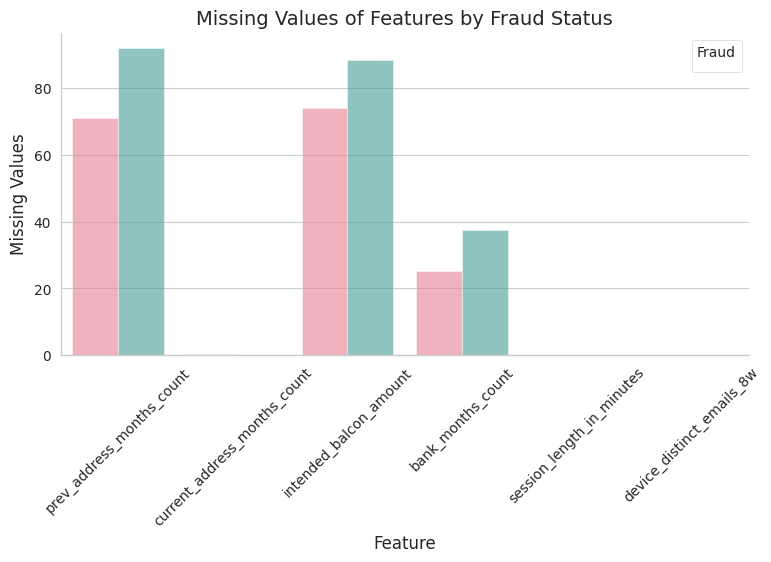

In [19]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data=missing_vals, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Missing Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Display plot
plt.show()

When examining features like prev_address_months_count, intended_balcon_amount, and bank_months_count, it becomes apparent that a considerable number of missing values exist in their original distribution. However, despite these missing values, these features still hold informative value and exhibit correlation with the target feature.

It's important to highlight that the missing values in these features are actually represented by negative values and were not transformed into explicit missing values during preprocessing. The potential impact of such a transformation has not been evaluated, as it could potentially result in information loss, even though negative values themselves do not possess any specific meaning.

Question 1: What's the benefit of showing the missing value % by each target class of the feature ? How it may assist our decision making in some cases ?

The benefit is to show the volume of missing values by percentage. These information helps us to identify features with missing values and to better understand the dataset. For example, bank_months_count feature has missing values and this feature could be helpful to know how long the bank account was active because fraudsters might target accounts that have been active for longer period of time.

In [20]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


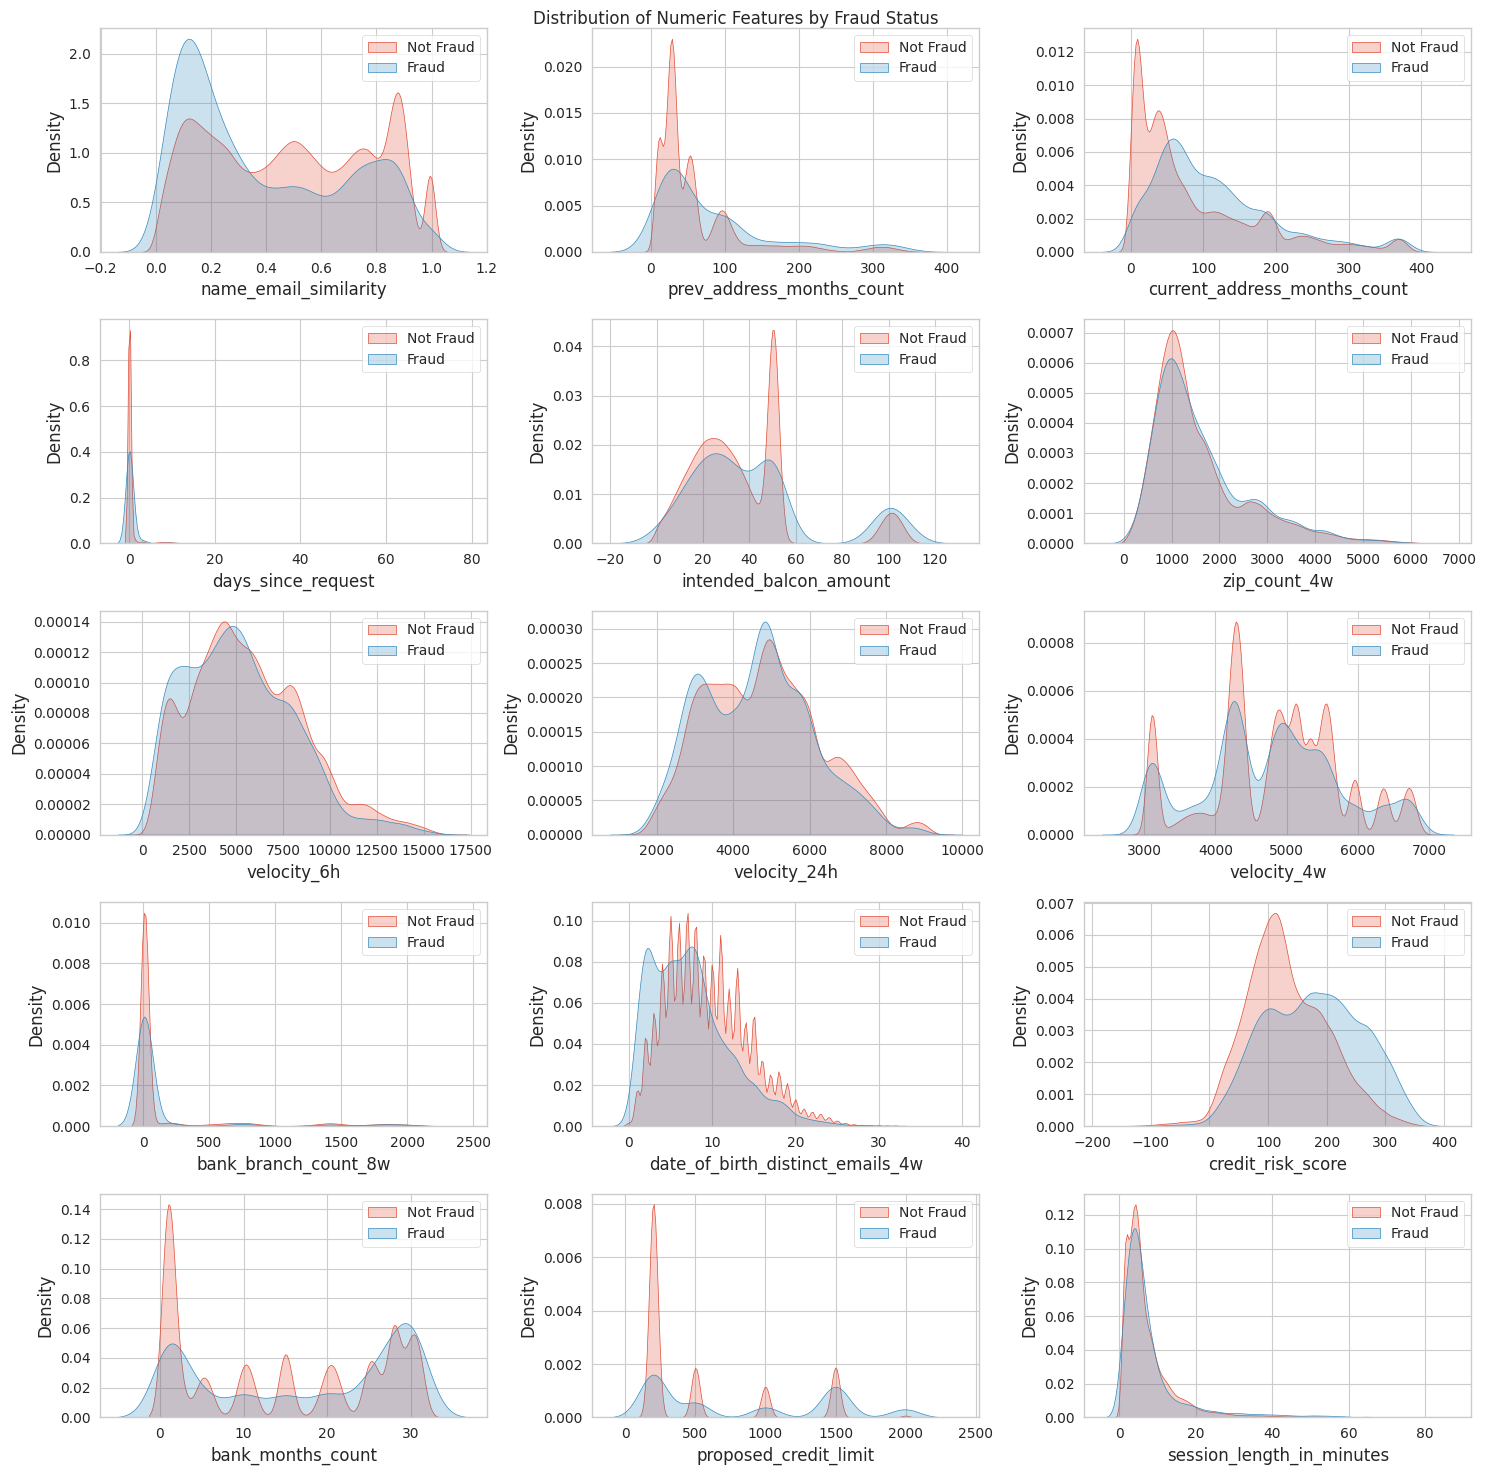

In [21]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

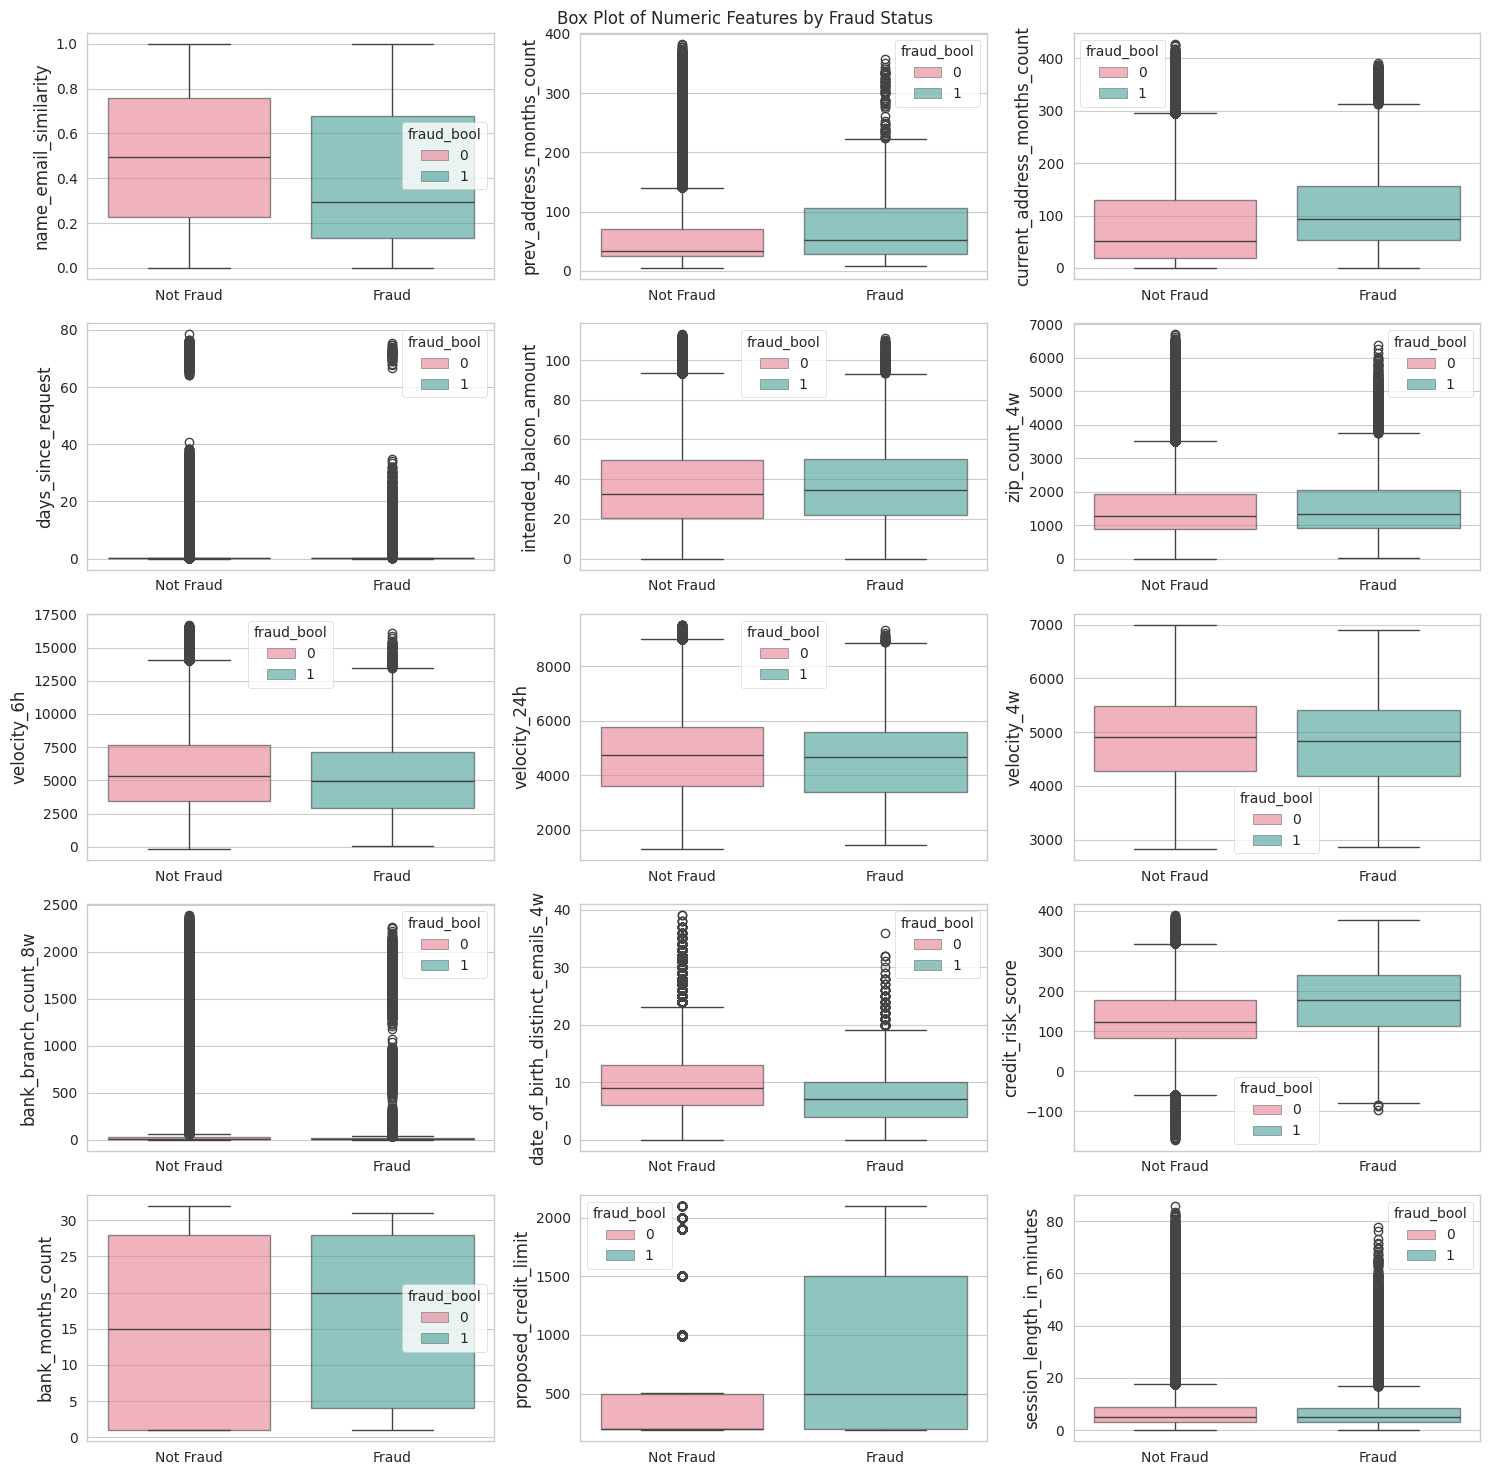

In [22]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, hue='fraud_bool', ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Removing outliers in the context of imbalanced data can pose challenges. Outliers may contain valuable information or represent rare instances of the minority class. Their removal can lead to information loss, distort the class distribution, introduce bias towards the majority class, and deviate from real-world scenarios.

Considering the potential impact on model performance, it is important to exercise caution and explore alternative approaches that preserve the integrity of the imbalanced data while addressing outliers, such as robust modeling techniques or outlier detection methods specifically designed for imbalanced datasets.

Question 2: I see your comment saying careful about removing outlier, and you have also talked about the reason why we do not want to remove records during the meeting (that was insightful). I am curious though, if not remove outlier, how about "capping" outlier? Is it generally also not recommended to cap outlier in fraud detection modeling?

Capping outliers method should be used upon the specific context and characteristics of the data. Below is some details between when to use and not to use it.

When to Cap Outliers in Fraud Modeling

1. Extreme Outliers:

Impact on Model: Extreme outliers can disproportionately affect model performance, especially for algorithms sensitive to the range of data (e.g., linear regression).

Noise Reduction: Capping can reduce the noise caused by erroneous or extreme values that do not represent typical fraudulent behavior.

2. Skewed Distributions:

Data Distribution: If the features have highly skewed distributions due to extreme values, capping outliers can help in normalizing the distribution, making the model more stable and accurate.

3. Improving Robustness:

Model Robustness: Capping can enhance the robustness of the model by reducing the influence of outliers, leading to more generalized performance across different data samples.

4. Domain Knowledge:

Domain Insights: In fraud detection, certain extreme values may be indicative of fraudulent activity. Use domain knowledge to determine if these outliers should be capped or retained for their predictive power.

When Not to Cap Outliers in Fraud Modeling

1. Informative Outliers:

Signal in Outliers: Outliers in fraud data can sometimes be the very indicators of fraudulent activity. Capping them might remove critical information that is essential for identifying fraud.

2. Anomaly Detection:

Nature of the Problem: If the model's objective is to detect anomalies or outliers (fraudulent activities), then preserving outliers might be more beneficial.

3. Algorithm Choice:

Algorithm Robustness: Some algorithms, like tree-based methods (e.g., Random Forest, Gradient Boosting), are inherently robust to outliers. In such cases, capping may not provide significant benefits.


In [23]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]
print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [24]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))

# Display the first 5 rows of the DataFrame
new_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9,0,1500.0,0,16.224843,1,1,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2,0,1500.0,0,3.363854,1,1,0,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30,0,200.0,0,22.730559,0,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1,0,200.0,0,15.215816,1,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26,0,200.0,0,3.743048,0,1,0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [25]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

One-hot encoding categorical features is a valuable technique that transforms them into a format suitable for machine learning. It represents each category as a binary variable, capturing their distinctness and independence. By using one-hot encoding, the algorithm can effectively incorporate categorical information during model training. This enables better prediction and accurate decision-making based on the categorical feature values.

Question 3: You choose One-Hot encoding for categorical feature. I think in this case where the cardinality is not high for all categorical variables. I am curious have you used or consider using target encoding ? This is like ordering the category based on its fraud % in each category. In my previous work, I see people took approach similar to target encoding, so I am wondering whether you've used it before.

Yes, I know this method, but I have never used it before. Below is some additional details between both methods.

One-Hot Encoding

Description:

One-hot encoding converts categorical variables into a binary (0 or 1) matrix representation.
Each category is transformed into a new binary feature, where only one feature is active (1) for each observation, and all other features are inactive (0).
When to use:

Nominal Data: Suitable for nominal categories where there is no ordinal relationship between the categories.

Low Cardinality: Best used when the categorical variable has a relatively small number of unique categories.

Algorithms: Works well with algorithms that can handle sparse input and benefit from binary representation, such as tree-based methods and neural networks.

Advantages:

No Assumptions: Makes no assumptions about the relationships between categories.

Interpretability: Easy to interpret as each column represents a distinct category.

Disadvantages:

Dimensionality: Can lead to a significant increase in dimensionality when dealing with high-cardinality categorical features.

Sparsity: Results in sparse matrices which can be computationally inefficient for certain algorithms.

Target Encoding

Description:

Target encoding (or mean encoding) replaces each category with the mean of the target variable for that category.

Can also use other statistics such as median or smoothing techniques to avoid overfitting.

When to use:

High Cardinality: Useful for high-cardinality categorical features where one-hot encoding would be impractical due to the explosion in the number of features.

Ordinal Relationships: When there might be a relationship between the categories and the target variable.

Advantages:

Dimensionality Reduction: Reduces the number of features compared to one-hot encoding, making it more computationally efficient for high-cardinality features.

Potentially More Informative: Captures some information about the target variable, which can improve model performance.

Disadvantages:

Risk of Leakage: Can introduce target leakage if not properly handled, especially if the encoding is based on the entire dataset.

Overfitting: Can lead to overfitting, particularly if the categories are rare or if there are few training examples per category.

Key Differences

Representation:

One-Hot Encoding: Creates binary columns for each category.

Target Encoding: Replaces categories with statistical measures related to the target variable.

Dimensionality:

One-Hot Encoding: Increases the number of features, which can be problematic for high-cardinality variables.

Target Encoding: Does not increase the number of features, making it suitable for high-cardinality variables.

Model Sensitivity:

One-Hot Encoding: Models do not get additional target-related information.

Target Encoding: Models can potentially benefit from the additional target-related information, but it must be handled carefully to avoid overfitting and leakage.

Algorithm Compatibility:

One-Hot Encoding: Well-suited for algorithms that can handle high-dimensional sparse matrices.

Target Encoding: Can be more beneficial for certain models that can leverage the additional target-related information.

In summary, one-hot encoding is straightforward and safe for low-cardinality categorical data, while target encoding can be more efficient and potentially more informative for high-cardinality categorical data, but it requires careful handling to prevent overfitting and leakage.


In [26]:
# Import the necessary libraries for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')

# Fit the preprocessor on the training set and transform both the training and testing sets
X_scaled = preprocessor.fit_transform(X)
# X_test_scaled = preprocessor.transform(X_test)

In [28]:
# Get the names of the features after pre-processing
feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
feature_names = [feature.replace('remainder__', '') for feature in feature_names]

# Print the pre-processed feature names
print(feature_names)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_B

In [29]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

MinMax scaling is employed to normalise numerical features within a specific range, usually 0 to 1. This technique standardises the features, ensuring equitable evaluation during training. By applying MinMax scaling, the numerical features become comparable, resulting in more dependable and precise outcomes from the machine learning algorithm.

MinMaxScaler, StandardScaler, and RobustScaler are techniques used to normalize or standardize features in your dataset, each with its specific use cases. Here's when and why you might use each one:

MinMaxScaler

When to use:

Range-Sensitive Algorithms: Algorithms like k-Nearest Neighbors (k-NN) and Neural Networks that rely on distance measures.

Bounded Data: When your data is bounded and you want to scale features to a specific range (usually [0, 1]).

Why to use:

Preserve Relationships: It preserves the relationships between data points by scaling them proportionally.

Normalization: Useful for normalizing features that are on different scales to a common scale without distorting differences in the ranges of values.

How it works:

Scales and translates each feature individually such that it is in the given range on the training set, typically [0, 1].

StandardScaler

When to use:

Normal Distribution: When features follow a normal (Gaussian) distribution or when the model assumes normally distributed data (e.g., linear regression, logistic regression).

Comparing Feature Scales: When you need to compare features that are on different scales but should have the same standard deviation.

Why to use:

Standardization: Scales data to have a mean of 0 and a standard deviation of 1, which is necessary for many machine learning algorithms.

Performance Improvement: Helps improve the performance and convergence speed of algorithms like gradient descent.

How it works:

Standardizes features by removing the mean and scaling to unit variance.

RobustScaler

When to use:

Outliers: When your data contains outliers and you want to reduce their influence.

Non-Normal Distribution: When your data does not follow a normal distribution and contains many extreme values.

Why to use:

Resilience to Outliers: Uses statistics that are robust to outliers (median and interquartile range) to scale features.

More Stable: Provides a more stable scaling in the presence of outliers compared to MinMaxScaler and StandardScaler.

How it works:

Centers and scales the data according to the median and the interquartile range.

In [30]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
# Import the necessary libraries for undersampling imbalanced datasets
from imblearn.under_sampling import NearMiss
from collections import Counter

In [32]:
# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_scaled_nm))

Test dataset samples per class Counter({0: 988971, 1: 11029})
Resampled dataset shape Counter({0: 11029, 1: 11029})


Undersampling the imbalanced dataset for feature selection tests has been carried out to address the issue of class imbalance. By reducing the instances of the majority class, the dataset becomes more balanced, allowing for a fairer evaluation of the feature selection process. This approach helps mitigate any potential bias towards the majority class and ensures that the selected features are robust and informative for both classes.

Undersampling and oversampling are techniques used to address class imbalance in datasets, particularly in binary classification problems where one class is significantly underrepresented compared to the other. Here's when and why you might use each technique:


Undersampling

When to use:

Class Imbalance: When the majority class significantly outnumbers the minority class.

Limited Resources: When you have constraints on computational resources and need to reduce the dataset size.

Training Time: When reducing training time is a priority.
Why to use:

Balance the Classes: By reducing the number of instances in the majority class, you balance the dataset, allowing the model to pay more attention to the minority class.

Prevent Overfitting: On large datasets, undersampling can help prevent the model from overfitting to the majority class.
Common Techniques:

Random Undersampling: Randomly removing instances from the majority class.
Cluster Centroids: Using clustering methods to replace the majority class with fewer representative samples.


Oversampling

When to use:

Class Imbalance: When the minority class has very few instances compared to the majority class.

Data Retention: When you want to retain all available data, especially if the dataset is small.

Model Performance: When undersampling leads to a loss of valuable information from the majority class.
Why to use:

Increase Minority Class Instances: By generating more instances of the minority class, you ensure the model learns to recognize patterns and characteristics of this class.

Improve Model Accuracy: Helps improve the model’s predictive accuracy for the minority class.
Common Techniques:

Random Oversampling: Randomly duplicating instances of the minority class.

SMOTE (Synthetic Minority Over-sampling Technique): Generating synthetic samples by interpolating between existing minority class instances.

ADASYN (Adaptive Synthetic Sampling): Similar to SMOTE, but focuses on generating samples near the decision boundary where the model has more difficulty.

Choosing Between Undersampling and Oversampling

Dataset Size: For large datasets, undersampling can be more practical, while for small datasets, oversampling might be necessary to avoid losing important data.

Model Performance: Often, a combination of both (e.g., SMOTE followed by undersampling) can be used to achieve better model performance.

Computational Efficiency: Consider the computational cost of each method. Undersampling reduces the size of the dataset, making it faster to train, while oversampling increases the size, which can lead to longer training times.

In practice, it's common to experiment with both techniques and evaluate their impact on model performance using cross-validation or a validation set.

In [33]:
# Create a list of categorical features in the DataFrame X_scaled_nm
categorical_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 2 and X_scaled_nm[feature].nunique() < 10]

print(categorical_features)

['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [34]:
# Create a list of numerical features in the DataFrame X_scaled_nm
numeric_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 10]

print(numeric_features)


['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes']


In [35]:
# Instantiate a VarianceThreshold selector and fit it to the NearMiss-resampled training set
selector = VarianceThreshold()
selector.fit(X_scaled_nm)

# Get the names of the constant features
constant_features = [feature for feature in X_scaled_nm.columns
                     if feature not in X_scaled_nm.columns[selector.get_support()]]

# Print the names of the constant features
print(constant_features)

['device_fraud_count']


In [36]:
# Dropping constant features
X_scaled_nm.drop(['device_fraud_count'], axis=1, inplace=True)

Features with no variance have been dropped from the dataset to improve the quality of the analysis. These features provide no useful information as they exhibit the same value across all instances. By removing them, we eliminate redundancy and reduce noise, enabling a more focused and accurate exploration of the remaining features.

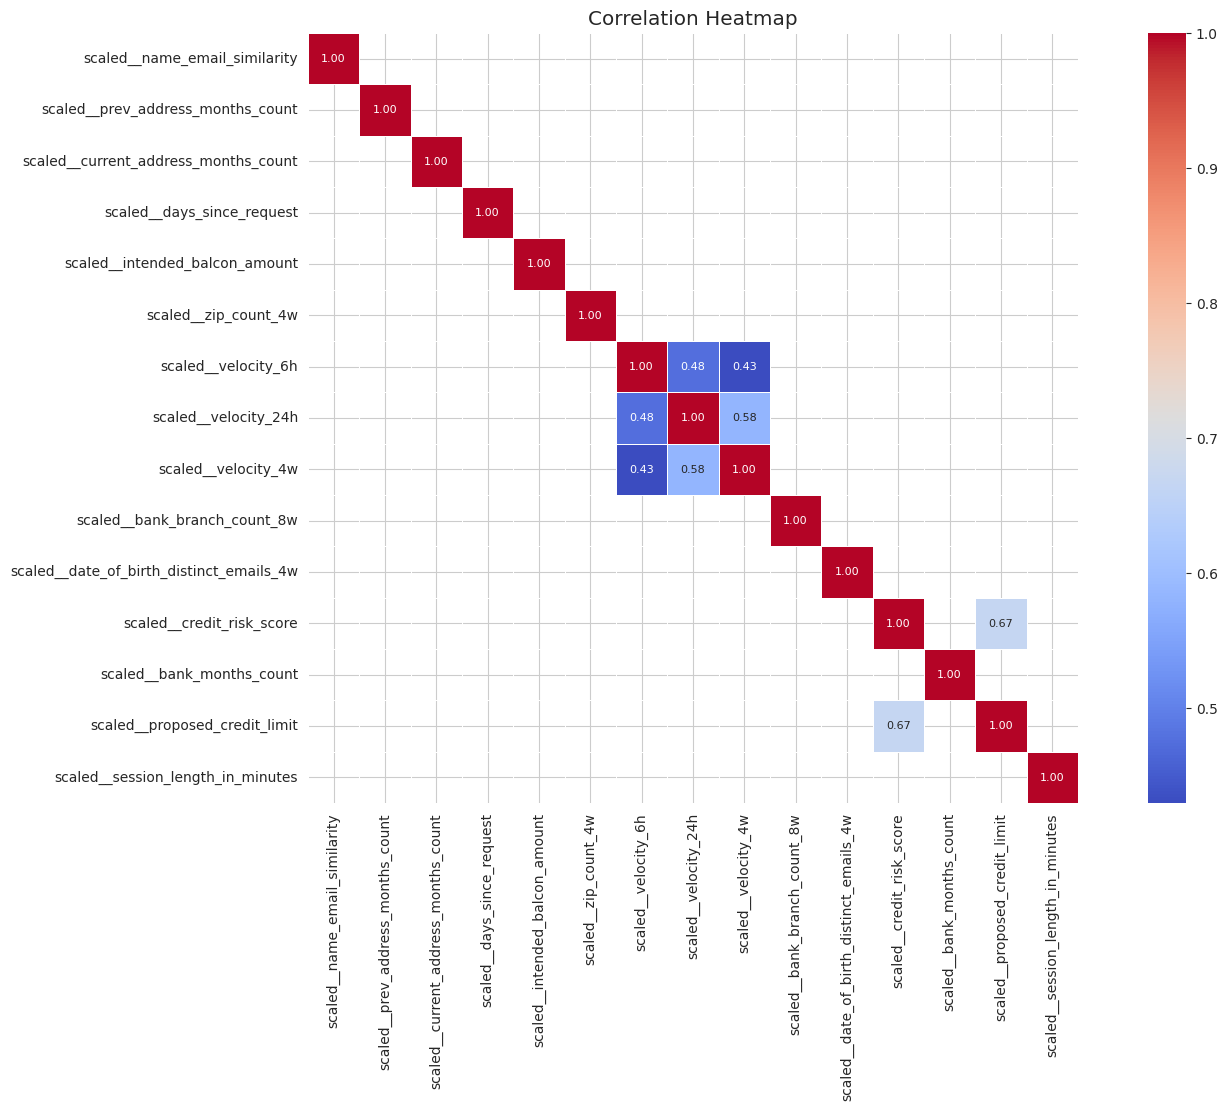

In [37]:
# Compute correlation matrix
X_train_corr = X_scaled_nm[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

To assess multicollinearity within the dataset, Pearson correlation coefficient was employed as a measure of linear relationship between features. This statistical analysis helped identify potential correlations between variables. Fortunately, no features displayed a correlation exceeding 0.67, indicating a lack of strong linear dependencies.

In [38]:
# Check the distribution of values in a column
X_scaled_nm.device_distinct_emails_8w.value_counts()

device_distinct_emails_8w
1.0     20865
2.0      1038
0.0       151
-1.0        4
Name: count, dtype: int64

In [39]:
# Identify the rows to drop based on a condition on a specific feature
rows_to_drop = np.where(X_scaled_nm['device_distinct_emails_8w'] < 0)[0]
rows_to_drop

# Drop the corresponding rows in X_train and y_train
X_train_cat = X_scaled_nm[categorical_features].copy()
X_train_cat.drop(rows_to_drop, axis=0, inplace=True)

y_train_cat = y_scaled_nm.copy()
y_train_cat.drop(rows_to_drop, axis=0, inplace=True)

Question 4: Why do we drop records drop based on this device_distinct_emails_8w?

Based on the dataset's dictionary, device_distinct_emails_8w is number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [0, 3]. Thus, I dropped anything under 0 because it could be due to system/human error. I did this step after scaling, so I would like to ensure that I am not including error in the scaling dataset.

Code below could help to show error:

for i in X_scaled_nm.columns:
  print(X_scaled_nm[i].value_counts())

In [40]:
# Use chi-squared test to evaluate the relationship between categorical features and the target variable
chi2_results = chi2(X_train_cat, y_train_cat)

In [41]:
# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})
chi2_results_df.head()

,feature,chi2,p_value
0,income,0.020349,8.865674e-01
1,customer_age,4117.151914,0.000000e+00
2,email_is_free,65.342642,6.294450e-16
3,phone_home_valid,1768.014023,0.000000e+00
4,phone_mobile_valid,117.021875,2.839188e-27


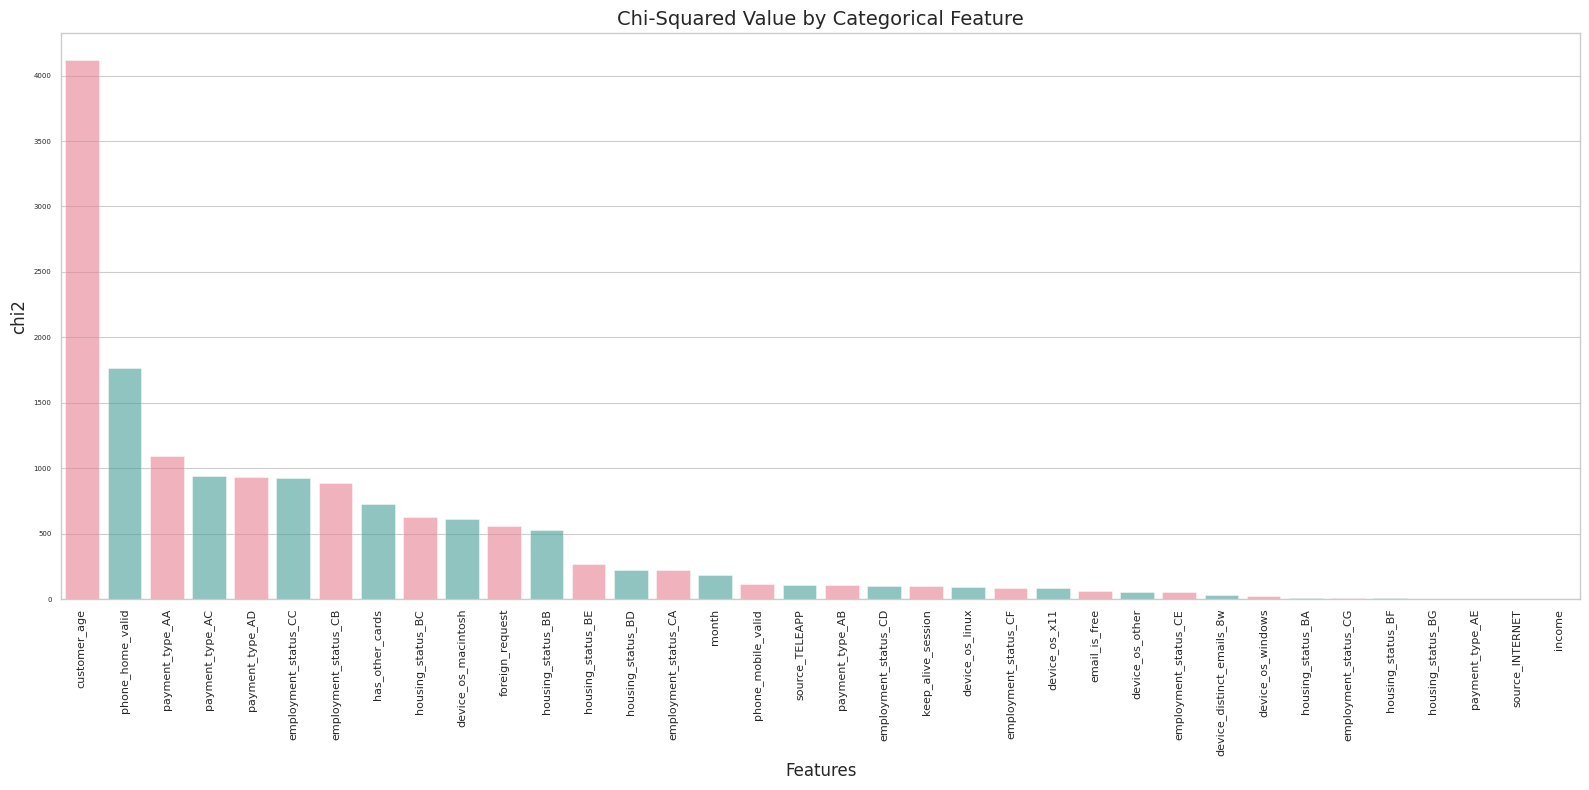

In [42]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between categorical features and the target variable, a chi-squared test was conducted. This statistical analysis allowed us to evaluate the relationship between the categorical variables and the target feature. The results of the chi-squared test unveiled an intriguing insight: among the examined categorical features, customer_age stood out as the most influential predictor of the target variable.

In [43]:
# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Get the names of the top 5 features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

[Index(['customer_age', 'phone_home_valid', 'has_other_cards',
       'foreign_request', 'payment_type_AA', 'payment_type_AC',
       'payment_type_AD', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BD', 'housing_status_BE', 'device_os_macintosh'],
      dtype='object')]


In [44]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled_nm[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y_scaled_nm.copy()

In [45]:
# Use mutual information test to evaluate the relationship between numerical features and the target variable
mutual_info_results = mutual_info_classif(X_train_num, y_train_num)

In [46]:
# Create a pandas DataFrame to store the mutual information test results
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

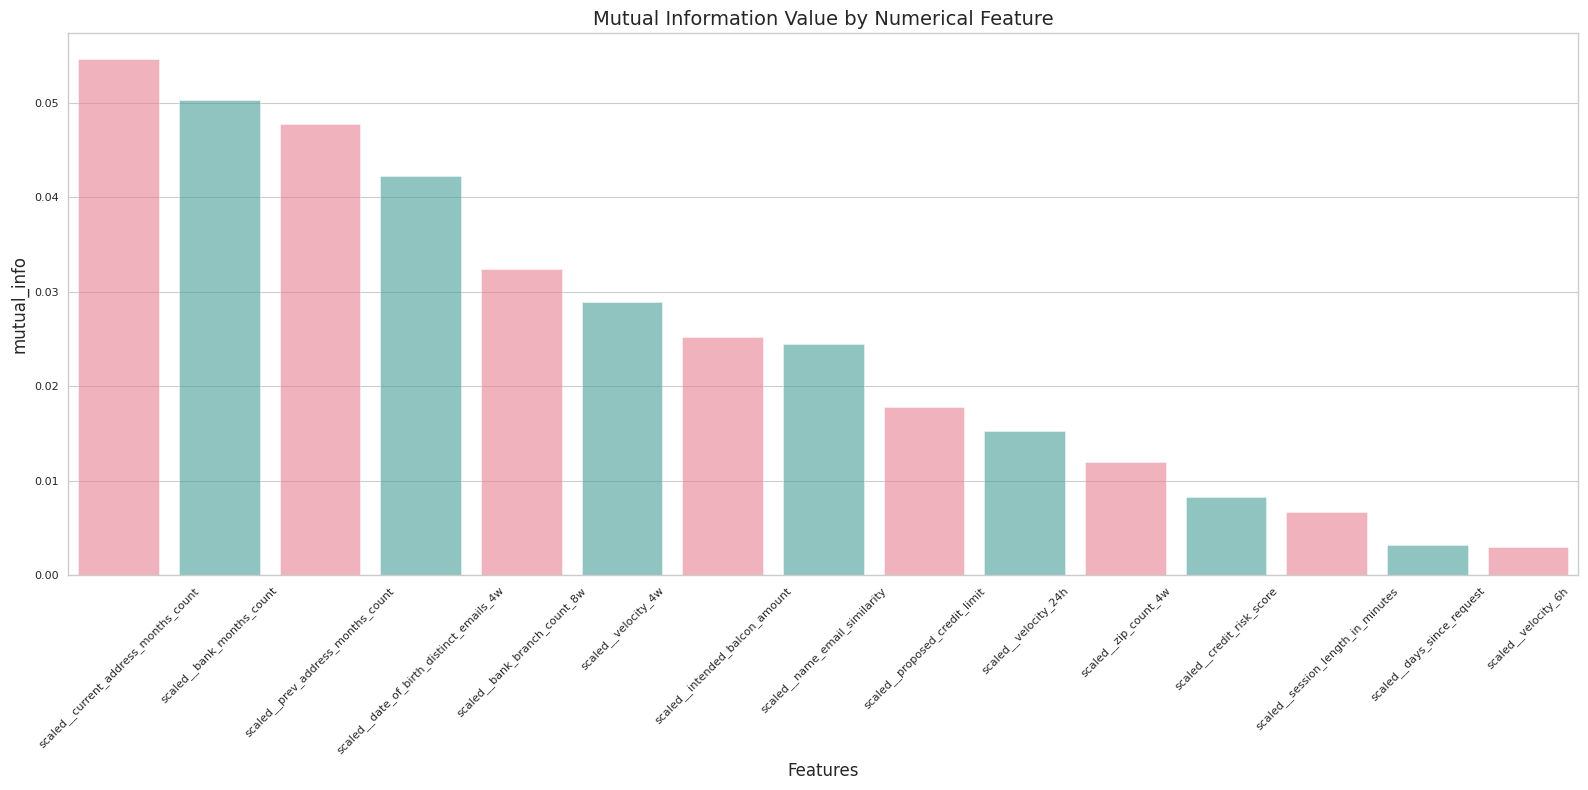

In [47]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between numeric features and the target variable, a mutual information test was conducted. This statistical analysis allowed us to evaluate the relationship between the numeric variables and the target feature. The results of the mutual information test unveiled an intriguing insight: among the examined numeric features, bank_months_count, current_address_months_count, and prev_address_months_count stood out as the most influential predictor of the target variable.

In [48]:
# Use SelectKBest with mutual information test to select the top 5 numerical features that are most strongly associated with the target variable
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(X_train_num, y_train_num)

# Get the names of the top 5 features
best_mutual_info_features = [X_train_num.columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

[Index(['scaled__name_email_similarity', 'scaled__prev_address_months_count',
       'scaled__current_address_months_count', 'scaled__days_since_request',
       'scaled__intended_balcon_amount', 'scaled__zip_count_4w',
       'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w',
       'scaled__bank_branch_count_8w',
       'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score',
       'scaled__bank_months_count', 'scaled__proposed_credit_limit',
       'scaled__session_length_in_minutes'],
      dtype='object')]


In [49]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_nm, y_scaled_nm)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_nm.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(best_extra_features)


['scaled__name_email_similarity', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AC', 'payment_type_AD', 'employment_status_CA', 'housing_status_BC', 'device_os_windows']


In [50]:
extra_importances = pd.DataFrame({'feature': X_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

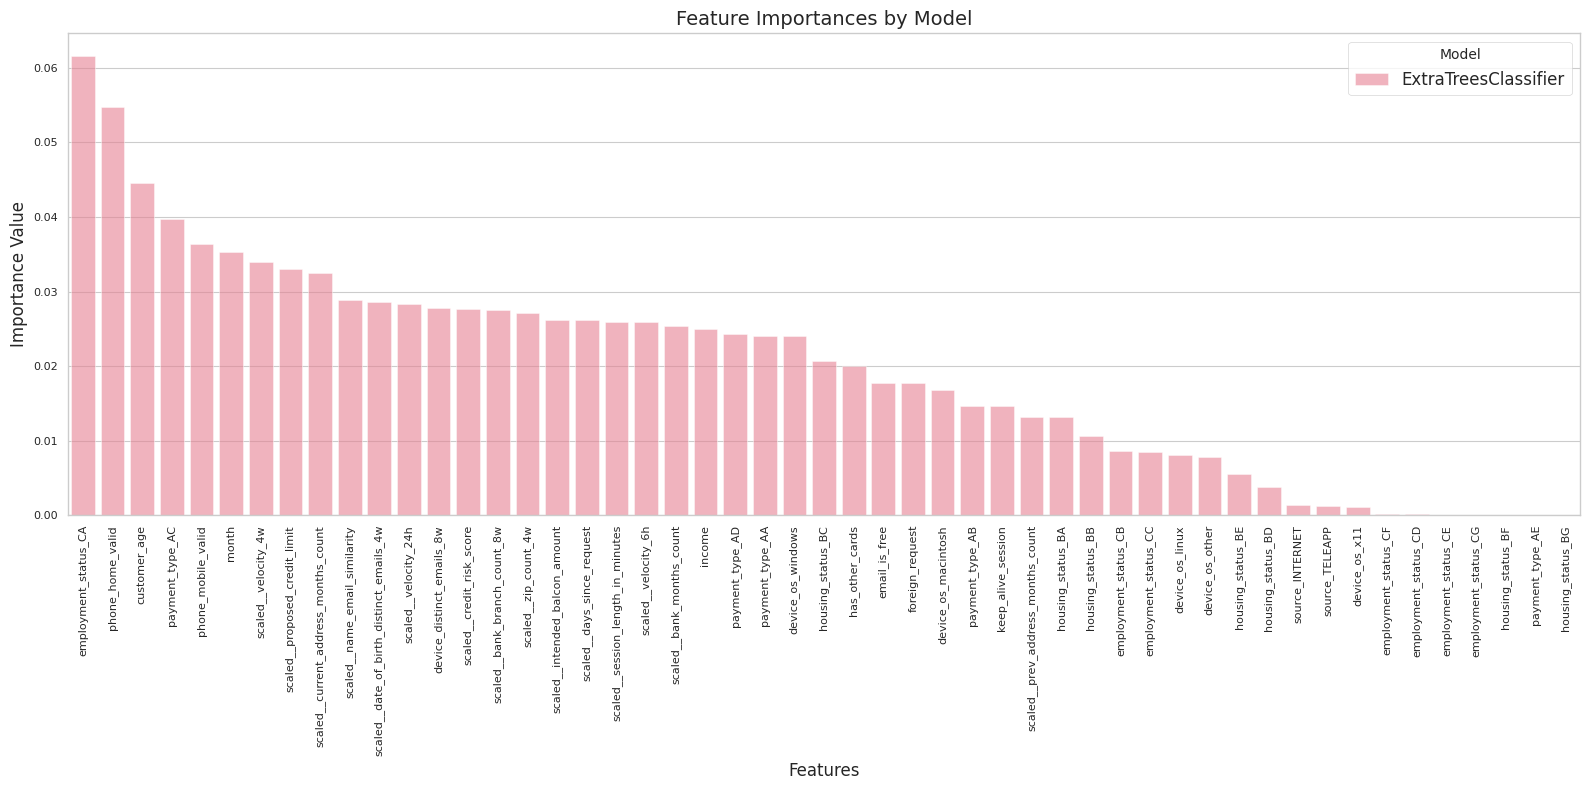

In [51]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The decision to employ the ExtraTreesClassifier for feature selection was motivated by its robustness and compatibility with our dataset. In contrast to the chi-squared and mutual information tests, the ExtraTreesClassifier yielded different outcomes. After evaluating various features using this model, we identified the most influential predictors for the target feature. Notably, employment_status_CA, phone_home_valid, customer_age, payment_type_AC, and phone_mobile_valid emerged as the top features.

Question 5: For the feature selection, good that you show different feature selection approach. For the ExtraTreesClassifier (I believe it belong to wrapper method), why do you only apply it to Numerical Features, isn't this model based feature selection can also work on "Categorical features" ? Any benefit to do it on the numerical features alone?

The ExtraTreesClassifier is only for numerical features, but it works for categorical features if I convert those using One-Hot Encoding. However, we know that only the customer_age feature has some meaning to the target feature where other categorical features seem to contribute very little meaning to the target feature based on the Chi-Square method.


Question 6: We use several feature selection techniques, but which technique should we eventually go with to select our final features? Should we do experiment? How to do experiment efficiently?

Yes, I plan to use GridSearch and RandomizedSearch method to let the model select the best features for each model.

Question 7: For the numerical featuers, you have plot this kde plots to show different distribution between fraud and non-fraud as in the screenshot. Could you also do similar plot for "categorical features" to help compare their distribution among fraud vs non-fraud?

I could, but I was only trying to show distribution of features with more than 10 distinct values. All categorical features in the dataset have less than 10 distinct values.

for i in df.columns:
  print(i, df[i].unique())



Question 8: There is no "new feature generation" yet, this is one of the thing I am particularly interested to see if you have some idea to create new feature based on existing features?

Besides One-Hot Encoding approach where it creates new features for all categorial variables, I did not create any new features to the dataset. I plan to implement a few models with these features to experience the accuracy and prediction of the data before doing a new feature generation. The reason is that we should not increase the complexitiy of the model when adding new features to the data.

Model Training: SMOTE and Grid Search CV

SMOTE (Synthetic Minority Over-sampling Technique) is an over-sampling technique used to tackle class imbalance problems. Unlike random under-sampling, SMOTE generates synthetic data points to create an equal balance between the minority and majority class. It picks the distance between the closest neighbors of the minority class to create new synthetic points. SMOTE retains more information since no rows are eliminated, unlike random under-sampling. However, SMOTE can take longer to train due to the generation of synthetic data.

When using SMOTE or undersampling techniques, it is crucial not to apply them before cross-validation. This is because it can influence the validation set before the cross-validation process, leading to overfitting. By doing so, we risk introducing data leakage. Instead, we should generate synthetic data points during cross-validation to avoid affecting the validation set. In this way, synthetic data is created only for the training set, ensuring that the validation set remains untouched.

In [52]:
# Import the necessary libraries for oversampling imbalanced datasets
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [53]:
# Import necessary modules for hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [54]:
def train_classifier(classifier, param_dist, X_train, y_train, encoded_features, search_type='random'):
    """
    Train a classifier using the specified parameters and return the trained model.

    Parameters:
    classifier (sklearn estimator): The estimator to train.
    param_dist (dict): The distribution of parameters to search over.
    X_train (pandas DataFrame): The training features.
    y_train (pandas Series): The training target.
    encoded_features (list): A list of encoded categorical features.
    search_type (str, optional): The type of hyperparameter search to perform. Must be either 'random' or 'grid'. Defaults to 'random'.

    Returns:
    A trained classifier.
    """

    # Apply SMOTENC to deal with imbalanced classes
    smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

    # Create pipeline with SMOTENC and the classifier
    pipeline = make_pipeline(smote_nc, classifier)

    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform hyperparameter search
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline,
                                      param_distributions=param_dist,
                                      n_iter=20,
                                      scoring="roc_auc",
                                      n_jobs=-1,
                                      cv=cv)
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 cv=cv)
    else:
        raise ValueError('search_type must be either "random" or "grid"')

    # Fit the model and return the trained classifier
    search_cv.fit(X_train, y_train)

    return search_cv

Model Training using Recall and ROC/AUC

ROC, AUC, and recall are important metrics used in evaluating the performance of classification models, especially in the context of binary classification. They each offer different perspectives on the model's performance. Here’s a detailed explanation of each:

ROC (Receiver Operating Characteristic) Curve

Definition:

The ROC curve is a graphical representation that illustrates the performance of a binary classifier system as its discrimination threshold is varied.

Components:

True Positive Rate (TPR): Also known as recall or sensitivity. It is the ratio of true positives to the sum of true positives and false negatives.

TPR = TP / (TP+FN)

False Positive Rate (FPR): It is the ratio of false positives to the sum of false positives and true negatives.

FPR = FP / (FP+TN)

Plot:

The ROC curve plots TPR (y-axis) against FPR (x-axis) at various threshold settings.

Usage:

A good classifier has a curve that hugs the top left corner, indicating a high true positive rate and a low false positive rate.

The diagonal line represents the performance of a random classifier (i.e., no better than random guessing).

AUC (Area Under the Curve)

Definition:

AUC stands for "Area Under the ROC Curve." It provides an aggregate measure of the classifier's performance across all possible classification thresholds.

Interpretation:

AUC = 1.0: Perfect classifier.

AUC = 0.5: No discriminative power (random classifier).

AUC < 0.5: Worse than random (indicates a flaw in the model or data).

Usage:

A higher AUC value indicates a better performing model.

AUC is useful for comparing the performance of different models.

Recall

Definition:

Recall, also known as sensitivity or True Positive Rate (TPR), is a measure of how well a classifier can identify positive instances.

Formula:

Recall = TP / (TP+FN)

Interpretation:

Recall focuses on the ability of the model to capture all the positive instances in the dataset.

High recall indicates that the model is able to identify most of the positive instances.

Usage:

Recall is particularly important in scenarios where missing positive instances (false negatives) is costly, such as in medical diagnosis or fraud detection.

Key Differences

ROC Curve:

A graphical tool to visualize the trade-off between TPR and FPR at various thresholds.

Useful for understanding the performance of a classifier at different thresholds.

AUC:

A single scalar value that summarizes the performance of the classifier over all thresholds.

Useful for comparing the overall performance of multiple classifiers.

Recall:

A single metric that measures the ability of the classifier to identify positive instances.

Important when the cost of missing positive instances is high.

Summary

ROC Curve: Visual tool to evaluate classifier performance across thresholds.

AUC: Single value summarizing the ROC curve, useful for comparing classifiers.

Recall: Measure of the classifier’s ability to find all positive instances, crucial in specific high-cost scenarios.

These metrics together provide a comprehensive understanding of a classifier's performance, enabling informed decisions about model selection and threshold tuning.



In [55]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

In [56]:
# Classification Report for Model Testing
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])

    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

In [57]:
# Confusion Matrix for Model Testing
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Define the tick marks and the labels for the plot
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Add the count of each cell of the confusion matrix to the plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

In [58]:
# Cross Validation for Model Testing
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

In [59]:
# ROC/AUC for Model Testing
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')

    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [60]:
def test_classifier(classifier, X_test, y_test):
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.

    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.

    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """

    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Choose a false positive rate threshold based on the ROC curve
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]

    # Make predictions on the testing set using the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Print the classification report for both default and target threshold
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Plot confusion matrix
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Adjust subplots for better visibility
    plt.tight_layout()

    # Display the plots
    plt.show()

    return fpr, tpr, default_recall, target_recall

Models

In [61]:
# Importing tree-based classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [62]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

In [63]:
# Dropping constant features from Variance Threshold test
X.drop(['device_fraud_count'], axis=1, inplace=True)

# # Selecting features from ExtraTreesClassifier test
# selected_features = [feature.replace('scaled__', '') for feature in best_extra_features]
# X = X[selected_features]

In [64]:
# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 0.1 and all available CPU cores
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_nm, y_nm = nm.fit_resample(X, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_nm))

Test dataset samples per class Counter({0: 988971, 1: 11029})
Resampled dataset shape Counter({0: 110290, 1: 11029})


In [65]:
# # Perform SMOTE oversampling to handle imbalanced data
# print(f'Test dataset samples per class {Counter(y)}')

# # Define the SMOTE oversampling
# smote = SMOTE(random_state=42)

# # Perform SMOTE oversampling on the feature matrix X and target variable y
# X_sm, y_sm = smote.fit_resample(X, y)

# # Print the number of occurrences of each class in the resampled dataset
# print('Resampled dataset shape %s' % Counter(y_sm))

In [66]:
# Import the necessary library for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [67]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm)

In [68]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]

Decision Tree

In [69]:
# Instantiate a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Define a dictionary of hyperparameters for DecisionTreeClassifier
dt_params = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
             'decisiontreeclassifier__max_depth': [2, 4, 6, 8, 10],
             'decisiontreeclassifier__max_features': ['sqrt', 'log2']
            }

In [70]:
# Train a DecisionTree classifier using 'train_classifier' function and the given parameters
dt_model = train_classifier(dt, dt_params, X_train, y_train, encoded_features)

In [71]:
print_cv_results(dt_model)

mean_test_score: 0.838653, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.836539, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.829521, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.828152, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.827952, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.827488, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclass

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.83      0.89     27573
       Fraud       0.28      0.68      0.40      2757

    accuracy                           0.81     30330
   macro avg       0.62      0.75      0.64     30330
weighted avg       0.90      0.81      0.85     30330

Target Threshold @ 0.86
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.94      0.95      0.95     27573
       Fraud       0.46      0.41      0.43      2757

    accuracy                           0.90     30330
   macro avg       0.70      0.68      0.69     30330
weighted avg       0.90      0.90      0.90     30330



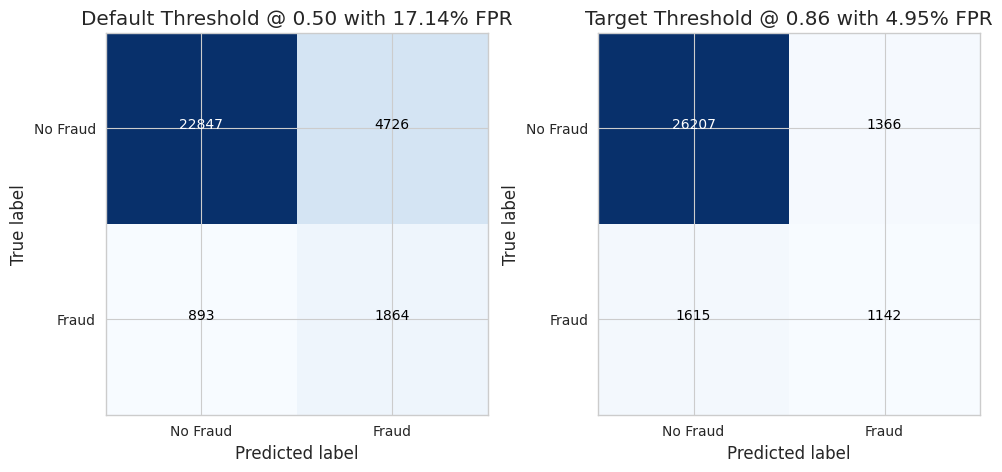

In [72]:
# Testing the DecisionTree model using the test data and calculating metrics
dt_fpr, dt_tpr, dt_default_recall, dt_target_recall = test_classifier(dt_model, X_test, y_test)

Random Forest

In [73]:
# Instantiate a RandomForestClassifier model
rf = RandomForestClassifier()

# Define a dictionary of hyperparameters for RandomForestClassifier
rf_params = {'randomforestclassifier__n_estimators': [20, 40, 60, 80, 100],
            'randomforestclassifier__criterion': ['gini', 'entropy'],
            'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
            'randomforestclassifier__max_features': ['sqrt', 'log2']
            }

In [ ]:
# Train a RandomForest classifier using 'train_classifier' function and the given parameters
rf_model = train_classifier(rf, rf_params, X_train, y_train, encoded_features)

In [ ]:
print_cv_results(rf_model)

In [ ]:
# Testing the RandomForest model using the test data and calculating metrics
rf_fpr, rf_tpr, rf_default_recall, rf_target_recall = test_classifier(rf_model, X_test, y_test)

XGBoost

In [ ]:
# Instantiate a XGBClassifier model with GPU acceleration for training
xgb = XGBClassifier(tree_method='gpu_hist')

# Define a dictionary of hyperparameters for XGBClassifier
xgb_params = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
             }

In [ ]:
# # Train a XGBoost classifier using 'train_classifier' function and the given parameters
xgb_model = train_classifier(xgb, xgb_params, X_train, y_train, encoded_features)

In [ ]:
print_cv_results(xgb_model)

In [ ]:
# Testing the XGBoost model using the test data and calculating metrics
xgb_fpr, xgb_tpr, xgb_default_recall, xgb_target_recall = test_classifier(xgb_model, X_test, y_test)

LightGBM

In [ ]:
# Instantiate a LGBMClassifier model with GPU acceleration for training
lgb = LGBMClassifier(device='gpu')

# Define a dictionary of hyperparameters for LGBMClassifier
lgb_params = {'lgbmclassifier__max_depth': [2, 4, 6, 8, 10],
               'lgbmclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
               'lgbmclassifier__n_estimators': [20, 40, 60, 80, 100],
               'lgbmclassifier__min_child_weight': [1, 2, 3, 4],
               'lgbmclassifier__subsample': [0.6, 0.8, 1.0],
               'lgbmclassifier__colsample_bytree': [0.6, 0.8, 1.0]
              }

In [ ]:
# Train a LightGBM classifier using 'train_classifier' function and the given parameters
lgb_model = train_classifier(lgb, lgb_params, X_train, y_train, encoded_features)

In [ ]:
print_cv_results(lgb_model)

In [ ]:
# Testing the LightGBM model using the test data and calculating metrics
lgb_fpr, lgb_tpr, lgb_default_recall, lgb_target_recall = test_classifier(lgb_model, X_test, y_test)

Decision Tree

Definition:

A decision tree is a flowchart-like tree structure where internal nodes represent feature tests, branches represent outcomes of those tests, and leaf nodes represent class labels or regression values.

Characteristics:

Structure: Single tree structure where each node represents a decision based on a feature.

Training: Greedily splits the dataset based on feature values to maximize information gain (e.g., Gini impurity, entropy for classification; mean squared error for regression).

Interpretability: Easy to interpret and visualize; provides clear decision paths.

Overfitting: Prone to overfitting, especially with deep trees and small datasets.

Bias-Variance Tradeoff: High variance (sensitive to small changes in data), low bias.

Advantages:

Simple to understand and interpret.

Requires little data preprocessing (no need for scaling or normalization).

Can handle both numerical and categorical data.

Capable of capturing non-linear relationships.

Disadvantages:

Prone to overfitting.

Unstable (small changes in data can result in a completely different tree).

Can be biased if some classes dominate.

Random Forest

Definition:

A random forest is an ensemble method that builds multiple decision trees and merges their results to improve accuracy and control overfitting.

Characteristics:

Structure: Collection of decision trees, typically trained with bootstrapped samples of the data.

Training: Each tree is trained on a random subset of the data and features. The final prediction is an average (regression) or majority vote (classification) of the individual trees.

Interpretability: Less interpretable than a single decision tree, but feature importance can still be evaluated.

Overfitting: Less prone to overfitting than individual decision trees.

Bias-Variance Tradeoff: Low variance (reduces overfitting), slightly higher bias compared to a single decision tree.

Advantages:

Higher accuracy than individual decision trees.

Reduces overfitting through averaging.

More robust and stable than individual trees.

Handles large datasets and high-dimensional data well.

Provides feature importance scores.

Disadvantages:

More complex and less interpretable than a single decision tree.

Requires more computational resources and time for training.

Predictions are slower compared to a single decision tree.

Key Differences

Model Structure:

Decision Tree: Single tree structure.

Random Forest: Ensemble of multiple decision trees.

Overfitting:

Decision Tree: Prone to overfitting.

Random Forest: Less prone to overfitting due to averaging multiple trees.

Interpretability:

Decision Tree: Highly interpretable and easy to visualize.

Random Forest: Less interpretable but provides feature importance.

Performance:

Decision Tree: May have higher variance and lower accuracy.

Random Forest: Generally higher accuracy and lower variance due to ensemble averaging.

Computational Complexity:

Decision Tree: Faster training and prediction times.

Random Forest: Slower training and prediction times due to multiple trees.

When to Use Which?

Decision Tree: Suitable for simple, interpretable models and when computational efficiency is crucial.

Random Forest: Preferred for higher accuracy and robustness, especially with large and complex datasets where overfitting is a concern.

Both algorithms have their own strengths and weaknesses, and the choice between them depends on the specific requirements of your task, including the need for interpretability, accuracy, and computational resources.

XGBoost (Extreme Gradient Boosting) and LightGBM (Light Gradient Boosting Machine) are both popular gradient boosting frameworks used for supervised learning tasks, particularly in machine learning competitions and real-world applications. While they share the same fundamental principles, there are several differences in terms of implementation, performance, and features. Here's a detailed comparison between the two:

1. Algorithm and Implementation

XGBoost:

Uses a level-wise (or depth-wise) approach to grow trees. This means that it expands the tree level by level, which can lead to more balanced trees.

Originally implemented in C++ and provides APIs in several languages including Python, R, Java, and Julia.

LightGBM:

Uses a leaf-wise (or leaf-wise best-first) approach to grow trees. This means that it expands the most promising leaf nodes first, which often results in deeper trees.

Implemented by Microsoft and is also written in C++. It provides APIs in languages like Python, R, and C++.

2. Speed and Efficiency

XGBoost:

Known for its efficiency and speed, but typically slower than LightGBM, especially with larger datasets.

Optimized for both memory efficiency and computational speed but uses more conservative tree growth which can be slower.

LightGBM:

Designed to be faster and more memory-efficient compared to XGBoost.
Can handle large datasets with many features more efficiently due to its leaf-wise tree growth and other optimizations.

3. Handling Large Datasets

XGBoost:

Can handle large datasets, but may require more memory and time for training compared to LightGBM.

Provides features like column block and sparsity-aware algorithms to optimize performance with large, sparse datasets.

LightGBM:

Particularly well-suited for large datasets. Its design allows for faster training and lower memory usage.

Uses techniques like histogram-based decision tree learning which makes it more efficient for large datasets.

4. Accuracy and Overfitting

XGBoost:

Generally provides high accuracy and has robust performance with various hyperparameter tuning options.

Can be less prone to overfitting due to its more balanced tree growth.

LightGBM:

Also provides high accuracy and often performs better in scenarios with large datasets and numerous features.

The leaf-wise growth can sometimes lead to overfitting if not properly tuned, especially with smaller datasets.

5. Ease of Use and Features

XGBoost:

Provides comprehensive documentation and a wide range of features including built-in cross-validation, early stopping, and various evaluation metrics.

Supports parallel and distributed computing.

LightGBM:

Known for its simplicity and ease of use with powerful default settings.
Supports many advanced features like categorical feature handling, efficient handling of sparse data, and parallel learning.

Provides built-in support for GPU training, which can further speed up the training process.

6. Hyperparameter Tuning

XGBoost:

Requires careful tuning of hyperparameters to achieve optimal performance.
Important hyperparameters include learning rate, max depth, min child weight, gamma, subsample, and colsample_bytree.

LightGBM:

Also requires hyperparameter tuning, but can often achieve good performance with less effort.

Important hyperparameters include num_leaves, max_depth, learning rate, feature_fraction, and bagging_fraction.

Summary
XGBoost is robust, widely used, and generally more conservative in its tree growth, making it less prone to overfitting in some cases.

LightGBM is faster and more efficient, especially with large datasets, but may require careful tuning to avoid overfitting due to its aggressive tree growth strategy.

Both libraries are powerful and choosing between them often depends on the specific characteristics of your dataset and the computational resources available. Experimentation and tuning are key to getting the best performance out of either library.

Plotting ROC/AUC

In [ ]:
# Create lists of FPR and TPR values for each classifier
fpr_list = [dt_fpr, rf_fpr, xgb_fpr, lgb_fpr]
tpr_list = [dt_tpr, rf_tpr, xgb_tpr, lgb_tpr]

# Create a list of labels for each classifier
label_list = ['DecisionTree', 'RandomForest', 'XGBoost', 'LightGBM']

# Plot ROC curves for each classifier using the FPR, TPR, and label lists
plot_roc_curves(fpr_list, tpr_list, label_list)

Plotting Recall Scores for Fraud Class at Default and Target Thresholds

In [ ]:
# Create a dataframe with the recall scores for each model
data = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Default Recall Score': [dt_default_recall[1], rf_default_recall[1], xgb_default_recall[1], lgb_default_recall[1]],
    'Target Threshold Recall Score': [dt_target_recall[1], rf_target_recall[1], xgb_target_recall[1], lgb_target_recall[1]]
})

# Sort the data by the threshold recall score in descending order
data = data.sort_values(by='Target Threshold Recall Score', ascending=False)

# Reshape the data
data = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(
    data=data,
    x='Model',
    y='Score',
    hue='Metric',
    palette=my_palette,
    alpha=.6,
)

# Customize labels and legend
plt.xlabel("Model", fontsize=12)
plt.ylabel("Recall Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Recall Scores for Fraud Class by Model and Threshold", fontsize=14)
plt.legend(title="Metric", fontsize=10)

# Display plot
plt.show()

# Real-World Deployment

In [ ]:
# Apply SMOTENC to deal with imbalanced classes
smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

In [ ]:
# Perform NearMiss undersampling to handle imbalanced data
print(f'Train dataset samples per class {Counter(y_train)}')

# Apply SMOTENC to deal with imbalanced classes
sm = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

# Perform SMOTE oversampling on the feature matrix X_nm and target variable y_nm
X_sm, y_sm = sm.fit_resample(X_train, y_train)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_sm))

In [ ]:
# Instantiate final XGBClassifier model with GPU acceleration for training
xgb_final = XGBClassifier(n_estimators = 100,
                        max_depth = 10,
                        learning_rate = 0.15,
                        min_child_weight = 2,
                        subsample = 0.6,
                        colsample_bytree = 0.8
                        )

In [ ]:
# Train final XGBoost classifier using the best parameters
xgb_final.fit(X_sm, y_sm)

In [ ]:
# Testing final XGBoost model using the test data and calculating metrics
xgb_final_fpr, xgb_final_tpr, xgb_final_default_recall, xgb_final_target_recall = test_classifier(xgb_final, X_test, y_test)

6/14:

Fraud experience

6/21:

Bar chart for categorical features by Fraud/Non-Fraud

Feature Generation

Feature Selection

Neural Network Model

6/28:

Pipeline